In [1]:
import torch
import torchvision
from GenoDrawingLib.models import Encoder,Decoder
from GenoDrawingLib.plot_utils import store_18_examples_AE

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(device)

cuda


In [2]:
dataset_transform = torchvision.transforms.Compose([
torchvision.transforms.ToTensor(),
torchvision.transforms.Resize(size=(300,300))]
)

dataset = torchvision.datasets.ImageFolder("Example_images",transform=dataset_transform)


In [3]:
dims = 64
encoder = Encoder(dims=dims)
decoder = Decoder(dims=dims)
encoder.load_state_dict(torch.load("AE_model/64_encoders_35_epochs/model_data_7_2_2023_15h/encoder_7_2_2023_15h.h5"))
decoder.load_state_dict(torch.load("AE_model/64_encoders_35_epochs/model_data_7_2_2023_15h/decoder_7_2_2023_15h.h5"))
encoder.to(device)
decoder.to(device)
encoder.eval()
decoder.eval()

Decoder(
  (decoder_lin): Sequential(
    (0): Linear(in_features=64, out_features=2048, bias=True)
    (1): LeakyReLU(negative_slope=0.01, inplace=True)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=2048, out_features=4096, bias=True)
    (4): LeakyReLU(negative_slope=0.01, inplace=True)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=4096, out_features=8192, bias=True)
    (7): LeakyReLU(negative_slope=0.01, inplace=True)
    (8): Dropout(p=0.3, inplace=False)
  )
  (decoder_unflatten): Unflatten(dim=1, unflattened_size=(128, 8, 8))
  (decoder_cnn): Sequential(
    (0): ConvTranspose2d(128, 128, kernel_size=(3, 3), stride=(2, 2))
    (1): LeakyReLU(negative_slope=0.01, inplace=True)
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ConvTranspose2d(128, 128, kernel_size=(3, 3), stride=(2, 2), output_padding=(1, 1))
    (4): LeakyReLU(negative_slope=0.01, inplace=True)
    (5): BatchNorm2d(128, eps

9


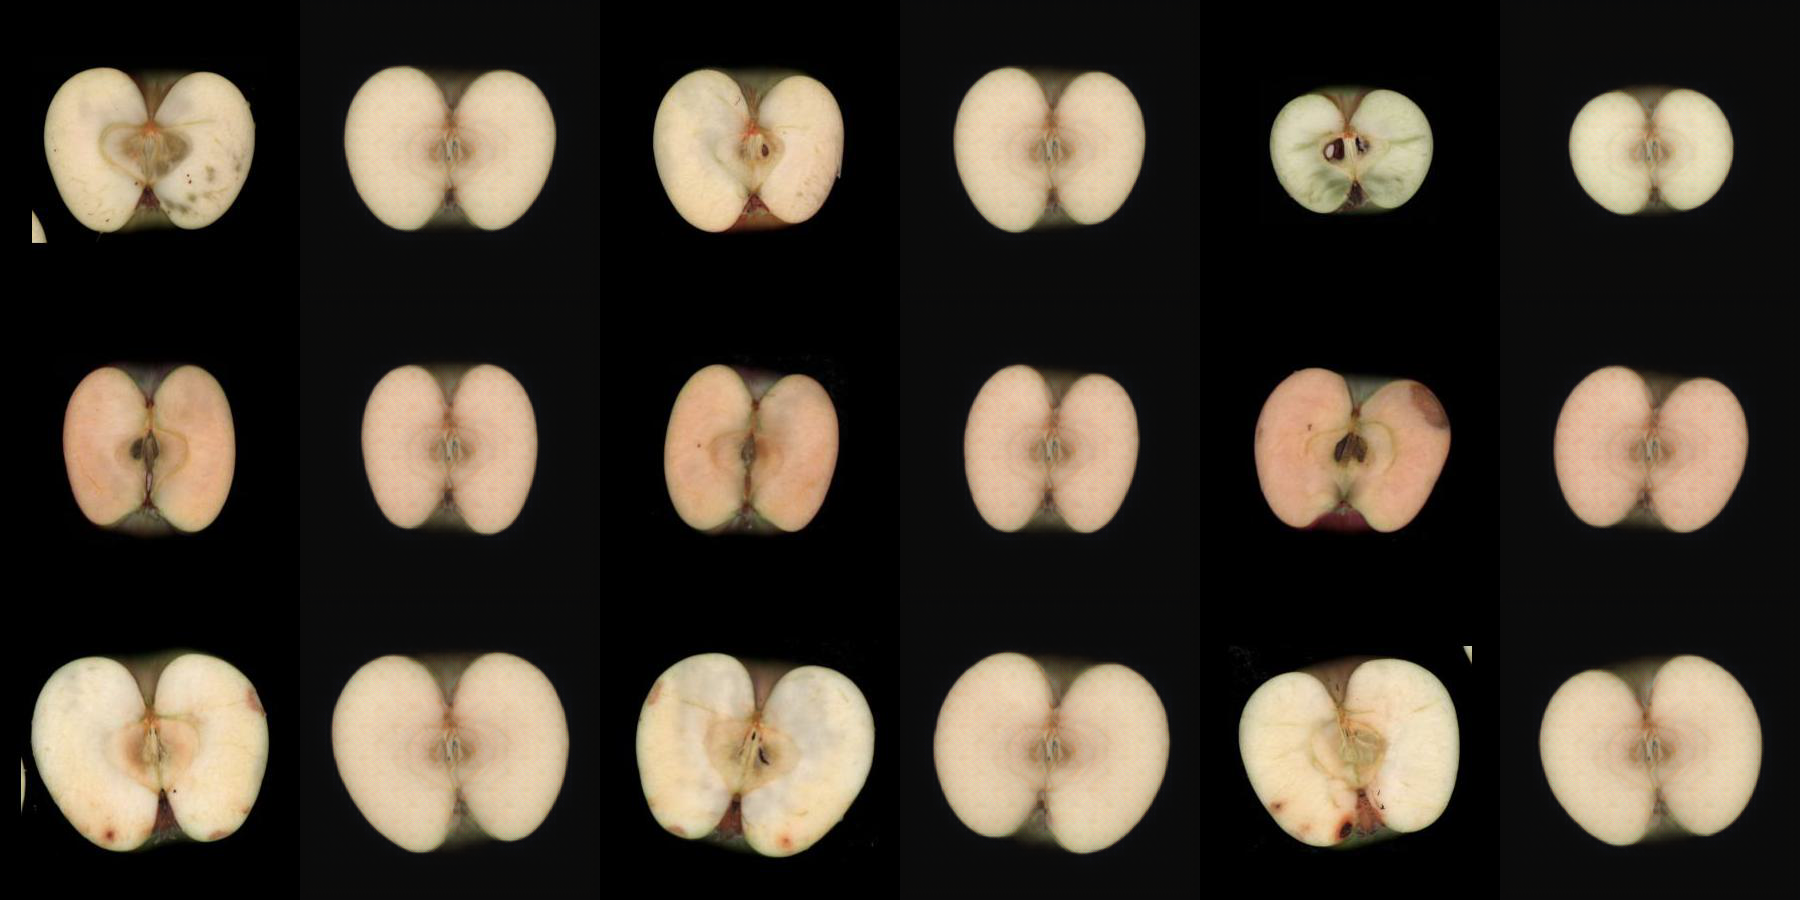

In [4]:
store_18_examples_AE(dataset,encoder,decoder,device)

In [5]:
store_18_examples_AE(dataset,encoder,decoder,device).save("Figures/Examples_for_the_AE.png")

9
